Fitted parameter:
n: 2.243459417090859


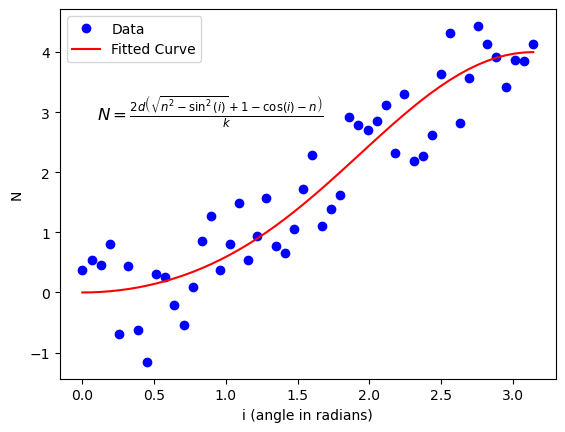

In [45]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

def add_noise(data, noise_level=0.5):
    noise = np.random.normal(0, noise_level, data.shape)
    return data + noise


def model_function(i, n, d, k):
    return (2 * d * (np.sqrt(n**2 - np.sin(i)**2) + 1 - np.cos(i) - n)) / k

# Generate more data points
i_data = np.linspace(0, np.pi, 50)
n_true = 2.0 
k = 1.5 
d = 1.5  

# Example data 
N_data = model_function(i_data, n_true, d, k)
N_data = add_noise(N_data)
initial_guess = [1.5]  # Initial guess for n

# Fit the model to the data
params, covariance = curve_fit(lambda i, n: model_function(i, n, d, k), i_data, N_data, p0=initial_guess)
n_fitted = params[0]

# Print fitted parameter
print(f"Fitted parameter:")
print(f"n: {n_fitted}")

# Generate fitted values 
N_fitted = model_function(i_data, n_fitted, d, k)

# Format the formula with the fitted value of n
formula_text = (f"$N = \\frac{{2d\\left(\\sqrt{{n^2 - \\sin^2(i)}} + 1 - \\cos(i) - n\\right)}}{{k}}$")

# Plot tdata
plt.plot(i_data, N_data, 'bo', label='Data')
plt.plot(i_data, N_fitted, 'r-', label='Fitted Curve')
plt.text(0.1, 3.3, formula_text, fontsize=12, color='black', ha='left', va='top')

# Labels
plt.xlabel('i (angle in radians)')
plt.ylabel('N')
plt.legend()

# Display the plot
plt.show()
